In [1]:
import pandas as pd
import numpy as np
import researchpy as rp
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [79]:
from sklearn.linear_model import LogisticRegression

In [80]:
dataset = pd.read_csv('bank-additional-full.csv', delimiter=';', na_values=['unknown', 'NaN']).dropna()

In [81]:
# changed to g1, g2, g3 instead of teen, adult, elder
# to increase the number of younster for more accurate
# prediction

In [82]:
age_group = pd.cut(dataset['age'], bins=[0, 30, 55, 100], labels=['g1', 'g2', 'g3'])
dataset.insert(5, 'age_group', age_group)

In [83]:
dataset['housing'] = dataset['housing'].map({'yes': 1, 'no': 0})
dataset['default'] = dataset['default'].map({'yes': 1, 'no': 0})
dataset['loan'] = dataset['loan'].map({'yes': 1, 'no': 0})
dataset['y'] = dataset['y'].map({'no': 0, 'yes': 1}).astype({'y': 'category'})

In [61]:
dataset['job']= dataset['job'].map({
    'admin.': 1, 
    'blue-collar': 2, 
    'technician': 3, 
    'services': 4, 
    'management': 5, 
    'retired': 6, 
    'self-employed': 7, 
    'entrepreneur': 8, 
    'unemployed': 9,
    'housemaid': 10,
    'student': 11
    }).astype({'job': 'category'})

dataset['education']= dataset['education'].map({
    'university.degree': 1, 
    'high.school': 2, 
    'professional.course': 3, 
    'basic.9y': 4, 
    'basic.4y': 5, 
    'basic.6y': 6, 
    'illiterate': 7
    }).astype({'education': 'category'})

dataset['marital'] = dataset['marital'].map({
    'single': 1, 
    'married': 2, 
    'divorced': 3
    }).astype({'marital': 'category'})

dataset['age_group'] = dataset['age_group'].map({
    'g1': 1, 'g2': 2, 'g3': 3
    }).astype({'age_group': 'category'})

dataset['contact'] = dataset['contact'].map({
    'cellular': 1, 'telephone': 2
    }).astype({'contact': 'category'})

dataset['month'] = dataset['month'].map({
    'jan': 1, 
    'feb': 2, 
    'mar': 3, 
    'apr': 4, 
    'may': 5, 
    'jun': 6, 
    'jul': 7, 
    'aug': 8, 
    'sep': 9, 
    'oct': 10, 
    'nov': 11, 
    'dec': 12}).astype({'month': 'category'})

dataset['poutcome'] = dataset['poutcome'].map({
    'failure': 1, 'nonexistent': 2, 'success': 3
    }).astype({'poutcome': 'category'})

In [85]:
dataset = pd.get_dummies(dataset, columns = ['job'])
dataset = pd.get_dummies(dataset, columns = ['education'])
dataset = pd.get_dummies(dataset, columns = ['marital'])
dataset = pd.get_dummies(dataset, columns = ['age_group'])
dataset = pd.get_dummies(dataset, columns = ['contact'])
dataset = pd.get_dummies(dataset, columns = ['month'])
dataset = pd.get_dummies(dataset, columns = ['poutcome'])

In [87]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30488 entries, 0 to 41187
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   age                            30488 non-null  int64   
 1   default                        30488 non-null  int64   
 2   housing                        30488 non-null  int64   
 3   loan                           30488 non-null  int64   
 4   day_of_week                    30488 non-null  object  
 5   duration                       30488 non-null  int64   
 6   campaign                       30488 non-null  int64   
 7   pdays                          30488 non-null  int64   
 8   previous                       30488 non-null  int64   
 9   emp.var.rate                   30488 non-null  float64 
 10  cons.price.idx                 30488 non-null  float64 
 11  cons.conf.idx                  30488 non-null  float64 
 12  euribor3m                      3

In [88]:
yy = dataset['y']
dataset = dataset.drop(['age', 'day_of_week', 'duration', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed', 'y'], axis=1)
#yy = yy.map({'no': 0, 'yes': 1}).astype({'y': 'category'})

In [89]:
dataset.head()

,default,housing,loan,campaign,pdays,previous,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,0,0,1,999,0,4.857,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,1,0,1,999,0,4.857,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,999,0,4.857,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,1,1,999,0,4.857,0,0,0,...,0,0,0,1,0,0,0,0,1,0
6,0,0,0,1,999,0,4.857,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [90]:
yy

0        0
2        0
3        0
4        0
6        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 30488, dtype: category
Categories (2, int64): [0, 1]

In [91]:
dataset.isnull().any()

default                          False
housing                          False
loan                             False
campaign                         False
pdays                            False
previous                         False
euribor3m                        False
job_admin.                       False
job_blue-collar                  False
job_entrepreneur                 False
job_housemaid                    False
job_management                   False
job_retired                      False
job_self-employed                False
job_services                     False
job_student                      False
job_technician                   False
job_unemployed                   False
education_basic.4y               False
education_basic.6y               False
education_basic.9y               False
education_high.school            False
education_illiterate             False
education_professional.course    False
education_university.degree      False
marital_divorced         

In [100]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(dataset, yy, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

length of oversampled data is  37236
Number of no subscription in oversampled data 18618
Number of subscription 18618
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


In [101]:
os_data_X.isnull().sum()

default                          0
housing                          0
loan                             0
campaign                         0
pdays                            0
previous                         0
euribor3m                        0
job_admin.                       0
job_blue-collar                  0
job_entrepreneur                 0
job_housemaid                    0
job_management                   0
job_retired                      0
job_self-employed                0
job_services                     0
job_student                      0
job_technician                   0
job_unemployed                   0
education_basic.4y               0
education_basic.6y               0
education_basic.9y               0
education_high.school            0
education_illiterate             0
education_professional.course    0
education_university.degree      0
marital_divorced                 0
marital_married                  0
marital_single                   0
age_group_g1        

In [102]:
X_train, X_test, y_train, y_test = train_test_split(os_data_X, os_data_y, test_size=0.2, random_state=None)

In [103]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29788 entries, 36062 to 10838
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   default                        29788 non-null  int64  
 1   housing                        29788 non-null  int64  
 2   loan                           29788 non-null  int64  
 3   campaign                       29788 non-null  int64  
 4   pdays                          29788 non-null  int64  
 5   previous                       29788 non-null  int64  
 6   euribor3m                      29788 non-null  float64
 7   job_admin.                     29788 non-null  uint8  
 8   job_blue-collar                29788 non-null  uint8  
 9   job_entrepreneur               29788 non-null  uint8  
 10  job_housemaid                  29788 non-null  uint8  
 11  job_management                 29788 non-null  uint8  
 12  job_retired                    29788 non-n

In [104]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

log_reg.score(X_train,y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


              precision    recall  f1-score   support

           0       0.79      0.85      0.82      3685
           1       0.84      0.78      0.81      3763

    accuracy                           0.82      7448
   macro avg       0.82      0.82      0.81      7448
weighted avg       0.82      0.82      0.81      7448



C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
result = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='precision')
result.mean()

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\anaconda\lib\site-

0.7936837553353675

In [107]:
result = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
result.mean()

C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\anaconda\lib\site-

0.7674902539476294

In [109]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print(f'True negative: {tn}')
print(f'True positive: {tp}')
print(f'False negative: {fn}')
print(f'False positive: {fp}')

True negative: 3148
True positive: 2923
False negative: 840
False positive: 537


In [110]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 score: {f1}')
print(f'Accuracy: {accuracy}')

Precision: 0.8447976878612716
Recall: 0.7767738506510763
F1 score: 0.8093589921085421
Accuracy: 0.8151181525241675


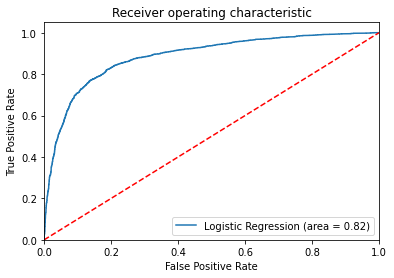

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()